<a href="https://colab.research.google.com/github/RavinaKarnik/Bharat-Intern/blob/main/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:08<00:00, 216MB/s]
100% 1.06G/1.06G [00:08<00:00, 136MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 1.3226 - accuracy: 0.6152 - val_loss: 0.6228 - val_accuracy: 0.6468
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5416 - accuracy: 0.7262 - val_loss: 0.5716 - val_accuracy: 0.7270
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4665 - accuracy: 0.7796 - val_loss: 0.4948 - val_accuracy: 0.7514
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3988 - accuracy: 0.8206 - val_loss: 0.4446 - val_accuracy: 0.7994
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3341 - accuracy: 0.8550 - val_loss: 0.5006 - val_accuracy: 0.7854
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2674 - accuracy: 0.8884 - val_loss: 0.5507 - val_accuracy: 0.7820
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1913 - accuracy: 0.9229 - val_loss: 0.6647 - val_ac

In [24]:
import cv2

In [25]:
test_img = cv2.imread('/content/cat.jpg')

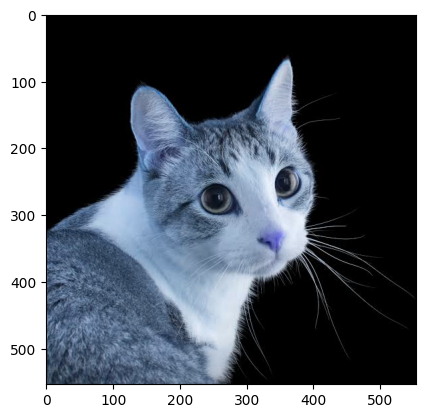

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

(554, 554, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 405ms/step


array([[0.]], dtype=float32)

In [31]:
test_img = cv2.imread('/content/Dog.jpg')

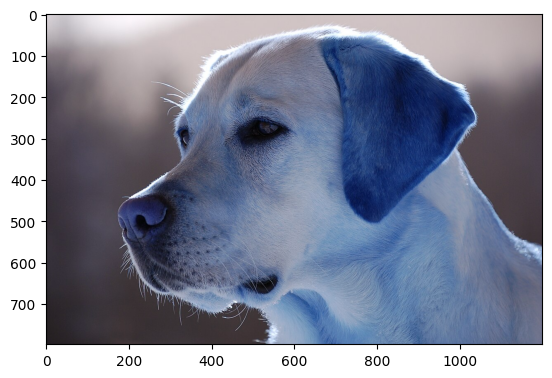

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(798, 1200, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [35]:
test_input = test_img.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)